In [1]:
import tensorflow as tf

In [2]:
#!pip install tensorflow==2.0.0-rc1

In [3]:
print(f"TensorFlow version = {tf.__version__}\n")

TensorFlow version = 2.0.0-rc1



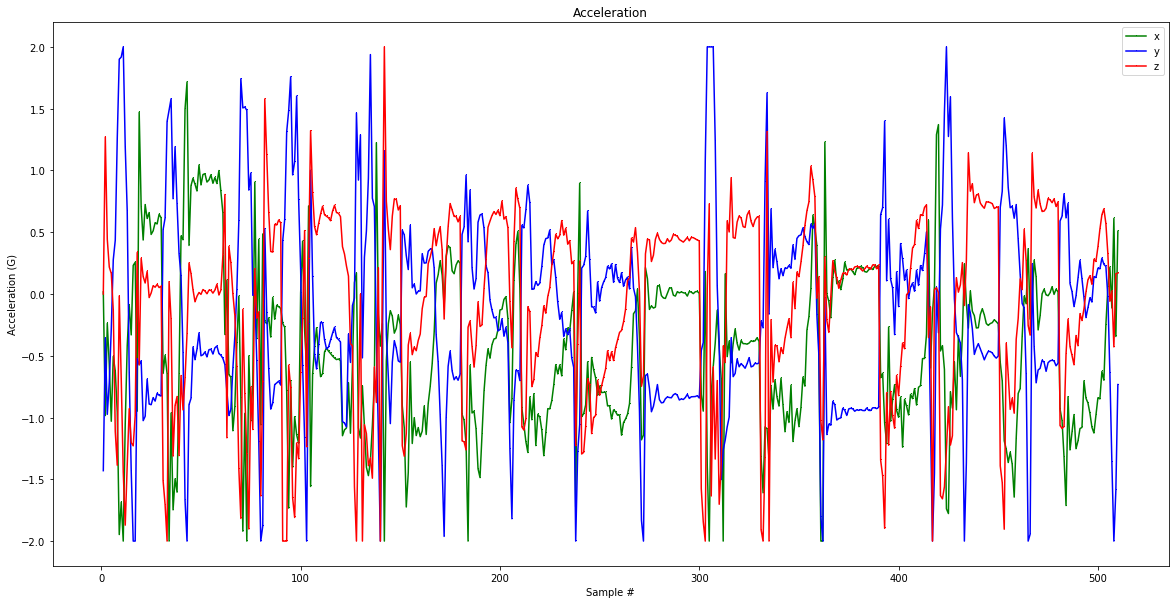

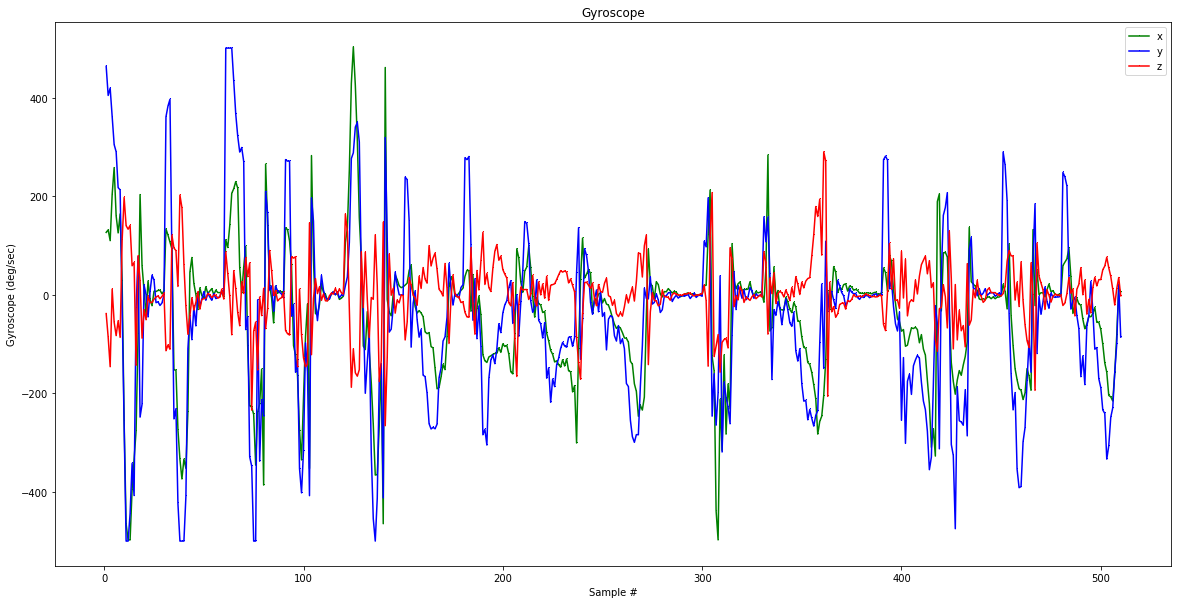

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = "punch.csv"

df = pd.read_csv(filename)

index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "punch",
    "flex",
]

SAMPLES_PER_GESTURE = 30

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv(gesture + ".csv")
  
  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

TensorFlow version = 2.0.0-rc1

Processing index 0 for gesture 'punch'.
	There are 17 recordings of the punch gesture.
Processing index 1 for gesture 'flex'.
	There are 43 recordings of the flex gesture.
Data set parsing and preparation complete.


In [8]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [9]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))



Train on 36 samples, validate on 12 samples
Epoch 1/600
36/36 [==============================] - 3s 70ms/sample - loss: 0.6431 - accuracy: 0.6944 - val_loss: 0.4180 - val_accuracy: 0.8333
Epoch 2/600
36/36 [==============================] - 0s 4ms/sample - loss: 0.5948 - accuracy: 0.6944 - val_loss: 0.5530 - val_accuracy: 0.8333
Epoch 3/600
36/36 [==============================] - 0s 8ms/sample - loss: 0.5435 - accuracy: 0.7500 - val_loss: 0.5368 - val_accuracy: 0.9167
Epoch 4/600
36/36 [==============================] - 0s 4ms/sample - loss: 0.5527 - accuracy: 0.7222 - val_loss: 0.3759 - val_accuracy: 0.8333
Epoch 5/600
36/36 [==============================] - 0s 4ms/sample - loss: 0.5332 - accuracy: 0.7222 - val_loss: 0.3573 - val_accuracy: 0.8333
Epoch 6/600
36/36 [==============================] - 0s 8ms/sample - loss: 0.5094 - accuracy: 0.6944 - val_loss: 0.4471 - val_accuracy: 1.0000
Epoch 7/600
36/36 [==============================] - 0s 7ms/sample - loss: 0.4618 - accuracy: 0.7

36/36 [==============================] - 0s 3ms/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1679 - val_accuracy: 0.9167
Epoch 53/600
36/36 [==============================] - 0s 3ms/sample - loss: 9.8146e-05 - accuracy: 1.0000 - val_loss: 0.0689 - val_accuracy: 0.9167
Epoch 54/600
36/36 [==============================] - 0s 2ms/sample - loss: 2.8408e-04 - accuracy: 1.0000 - val_loss: 0.4185 - val_accuracy: 0.9167
Epoch 55/600
36/36 [==============================] - 0s 2ms/sample - loss: 4.5383e-04 - accuracy: 1.0000 - val_loss: 0.1751 - val_accuracy: 0.9167
Epoch 56/600
36/36 [==============================] - 0s 3ms/sample - loss: 6.1080e-05 - accuracy: 1.0000 - val_loss: 0.4757 - val_accuracy: 0.9167
Epoch 57/600
36/36 [==============================] - 0s 2ms/sample - loss: 6.0443e-04 - accuracy: 1.0000 - val_loss: 0.0881 - val_accuracy: 0.9167
Epoch 58/600
36/36 [==============================] - 0s 2ms/sample - loss: 4.0327e-05 - accuracy: 1.0000 - val_loss: 0.0132 - va

Epoch 107/600
36/36 [==============================] - 0s 2ms/sample - loss: 3.5100e-07 - accuracy: 1.0000 - val_loss: 0.2498 - val_accuracy: 0.9167
Epoch 108/600
36/36 [==============================] - 0s 2ms/sample - loss: 1.0928e-07 - accuracy: 1.0000 - val_loss: 0.2012 - val_accuracy: 0.9167
Epoch 109/600
36/36 [==============================] - 0s 2ms/sample - loss: 1.7616e-06 - accuracy: 1.0000 - val_loss: 0.6865 - val_accuracy: 0.9167
Epoch 110/600
36/36 [==============================] - 0s 2ms/sample - loss: 3.0112e-05 - accuracy: 1.0000 - val_loss: 0.1525 - val_accuracy: 0.9167
Epoch 111/600
36/36 [==============================] - 0s 2ms/sample - loss: 8.9407e-08 - accuracy: 1.0000 - val_loss: 0.1760 - val_accuracy: 0.9167
Epoch 112/600
36/36 [==============================] - 0s 2ms/sample - loss: 9.9341e-08 - accuracy: 1.0000 - val_loss: 0.4451 - val_accuracy: 0.9167
Epoch 113/600
36/36 [==============================] - 0s 2ms/sample - loss: 2.6160e-07 - accuracy: 1.0000

Epoch 162/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3017 - val_accuracy: 0.9167
Epoch 163/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2823 - val_accuracy: 0.9167
Epoch 164/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2494 - val_accuracy: 0.9167
Epoch 165/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2682 - val_accuracy: 0.9167
Epoch 166/600
36/36 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2852 - val_accuracy: 0.9167
Epoch 167/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2760 - val_accuracy: 0.9167
Epoch 168/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000

Epoch 217/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2959 - val_accuracy: 0.9167
Epoch 218/600
36/36 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2905 - val_accuracy: 0.9167
Epoch 219/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2989 - val_accuracy: 0.9167
Epoch 220/600
36/36 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3009 - val_accuracy: 0.9167
Epoch 221/600
36/36 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3052 - val_accuracy: 0.9167
Epoch 222/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2950 - val_accuracy: 0.9167
Epoch 223/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000

Epoch 272/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3121 - val_accuracy: 0.9167
Epoch 273/600
36/36 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3156 - val_accuracy: 0.9167
Epoch 274/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3100 - val_accuracy: 0.9167
Epoch 275/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3094 - val_accuracy: 0.9167
Epoch 276/600
36/36 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3059 - val_accuracy: 0.9167
Epoch 277/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3064 - val_accuracy: 0.9167
Epoch 278/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000

Epoch 327/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3181 - val_accuracy: 0.9167
Epoch 328/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3173 - val_accuracy: 0.9167
Epoch 329/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3151 - val_accuracy: 0.9167
Epoch 330/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3218 - val_accuracy: 0.9167
Epoch 331/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3224 - val_accuracy: 0.9167
Epoch 332/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3178 - val_accuracy: 0.9167
Epoch 333/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000

Epoch 382/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3250 - val_accuracy: 0.9167
Epoch 383/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3274 - val_accuracy: 0.9167
Epoch 384/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3277 - val_accuracy: 0.9167
Epoch 385/600
36/36 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3242 - val_accuracy: 0.9167
Epoch 386/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3223 - val_accuracy: 0.9167
Epoch 387/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3212 - val_accuracy: 0.9167
Epoch 388/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000

Epoch 437/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3277 - val_accuracy: 0.9167
Epoch 438/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3309 - val_accuracy: 0.9167
Epoch 439/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3290 - val_accuracy: 0.9167
Epoch 440/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3285 - val_accuracy: 0.9167
Epoch 441/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3305 - val_accuracy: 0.9167
Epoch 442/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3298 - val_accuracy: 0.9167
Epoch 443/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000

Epoch 492/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3351 - val_accuracy: 0.9167
Epoch 493/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3370 - val_accuracy: 0.9167
Epoch 494/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3344 - val_accuracy: 0.9167
Epoch 495/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3338 - val_accuracy: 0.9167
Epoch 496/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3327 - val_accuracy: 0.9167
Epoch 497/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3356 - val_accuracy: 0.9167
Epoch 498/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000

Epoch 547/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3389 - val_accuracy: 0.9167
Epoch 548/600
36/36 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3379 - val_accuracy: 0.9167
Epoch 549/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3368 - val_accuracy: 0.9167
Epoch 550/600
36/36 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3381 - val_accuracy: 0.9167
Epoch 551/600
36/36 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3369 - val_accuracy: 0.9167
Epoch 552/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3365 - val_accuracy: 0.9167
Epoch 553/600
36/36 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  9050      
_________________________________________________________________
dense_3 (Dense)              multiple                  765       
_________________________________________________________________
dense_4 (Dense)              multiple                  32        
Total params: 9,847
Trainable params: 9,847
Non-trainable params: 0
_________________________________________________________________


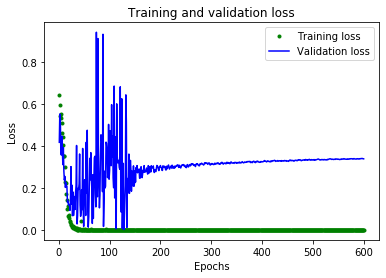

[6.0, 4.0]


In [24]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (6,4)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

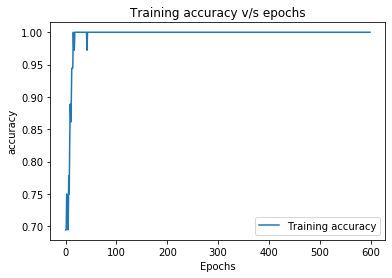

[6.0, 4.0]


In [25]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (6,4)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
#plt.plot(epochs, loss, 'g.', label='Training accuracy')
#plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.plot(loss,label='Training accuracy')
plt.title('Training accuracy v/s epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
#plt.xrange(0,200)
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

In [13]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)
  
  

Model is 40964 bytes
